# Thống kê máy tính và ứng dụng (Computational Statistics and Applications)

**Khoa Công nghệ Thông tin - ĐH Khoa học Tự nhiên TP. HCM ([fit@hcmus](https://www.fit.hcmus.edu.vn/))**

*Vũ Quốc Hoàng (vqhoang@fit.hcmus.edu.vn)*

# Bài 2 - Ôn tập biến ngẫu nhiên

**Nội dung**

* [Ôn tập biến ngẫu nhiên rời rạc](#bien_roi_rac)
* [Ôn tập biến ngẫu nhiên liên tục](#bien_lien_tuc)
  * [Ví dụ 1](#vi_du_1)
  * [Ví dụ 2](#vi_du_2)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## <a name="bien_roi_rac"/>Ôn tập biến ngẫu nhiên rời rạc

Để xấp xỉ kì vọng $E(X)$ của một biến ngẫu nhiên $X$ liên quan đến thí nghiệm $T$, ta có thể dùng phương pháp thống kê như sau

> Thực hiện lặp lại $N$ lần (độc lập) thí nghiệm $T$, ghi nhận các giá trị mà $X$ nhận $x_1, x_2, ..., x_N$ (còn gọi là mẫu dữ liệu - sample), và tính trung bình mẫu
$$\bar{x} = \frac{x_1 + x_2 + ... + x_N}{N}.$$ 

> Khi $N$ đủ lớn, ta có $\bar{x} \approx E(X)$. 

> Việc thực hiện lặp lại nhiều lần thí nghiệm $T$ có thể được **mô phỏng** (simulation) trên máy tính. (Chẳng hạn dùng thư viện tạo số ngẫu nhiên [random](https://docs.python.org/3/library/random.html) hay [numpy.random](https://numpy.org/doc/stable/reference/random/index.html).)

**Bài toán thu thập phiếu thưởng** (coupon collector's problem). Một cửa hàng phát hành $n$ loại phiếu thưởng khác nhau. Mỗi lần khách mua hàng sẽ được cửa hàng phát một tờ phiếu thưởng ngẫu nhiên trong $n$ loại. Khi khách thu thập được đủ $n$ loại phiếu thưởng thì được cửa hàng tặng quà.

*Hỏi:* khách cần mua hàng bao nhiêu lần từ cửa hàng để được nhận quà?

**Tính toán chính xác**

Gọi $X$ là số lần khách cần mua hàng để được nhận quà, tức là số lần cần mua hàng từ đầu cho đến khi thu thập *vừa đủ* $n$ loại phiếu thưởng.
    
Gọi $X_i$ là số lần cần mua hàng từ lúc *vừa đã có* $i - 1$ loại phiếu thưởng cho đến khi thu thập thêm được một loại mới để có *vừa đúng* $i$ loại phiếu thưởng ($i = 1, 2, ..., n$).
    
Ta có $X = \sum_{i=1}^n X_i$ và $X_i$ có phân phối hình học với tham số
$$
p_i = \frac{n - (i - 1)}{n} = \frac{n - i + 1}{n} \; (i=1, 2, ..., n).
$$

Từ đó ta có
$$
    E(X) = E\left(\sum_{i=1}^n X_i\right) = \sum_{i=1}^n E(X_i) = \sum_{i=1}^n \frac{n}{n-i+1} = n\sum_{i=1}^n \frac{1}{i} = nH_n,
$$
với $H_n = \sum_{i=1}^n \frac{1}{i}$ được gọi là **số điều hòa** (harmonic number) thứ $n$.

In [3]:
def H(n):
    return sum(1/i for i in range(1, n + 1))

def mean_num_buy_to_win(n):
    return n*H(n)

mean_num_buy_to_win(10)

29.289682539682538

**Mô phỏng**

In [4]:
def num_buy_to_win(n):
    coupons = []
    while len(set(coupons)) < n:
        coupons.append(random.randint(1, n))
    return len(coupons)

def average(n, N, X):
    m = sum(X(n) for _ in range (N))
    return m/N

average(10, 1000, num_buy_to_win)

29.013

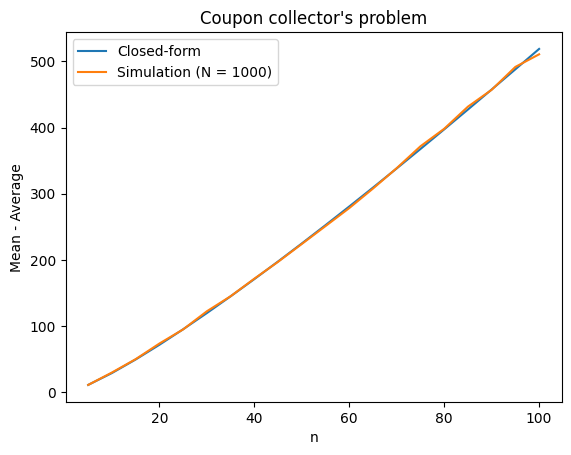

In [5]:
N = 1000
n_list = [5*i for i in range(1, 21)]
E_list = [mean_num_buy_to_win(n) for n in n_list]
A_list = [average(n, N, num_buy_to_win) for n in n_list]

plt.plot(n_list, E_list, label="Closed-form")
plt.plot(n_list, A_list, label=f"Simulation (N = {N})")
plt.legend()
plt.xlabel("n")
plt.ylabel("Mean - Average")
plt.title("Coupon collector's problem")
#plt.savefig("coupon.pdf", bbox_inches="tight")
plt.show()

## <a name="bien_lien_tuc"/>Ôn tập biến ngẫu nhiên liên tục

Để xấp xỉ hàm khối lượng xác suất (probability mass function) $f_X$ của một biến ngẫu nhiên rời rạc $X$ liên quan đến thí nghiệm $T$, ta có thể dùng phương pháp thống kê như sau

> Thực hiện lặp lại $N$ lần (độc lập) thí nghiệm $T$ và tính các tần suất $p_x$ của biến cố "$X$ nhận giá trị $x$". 

> Khi $N$ đủ lớn, ta có $p_x \approx P(X = x) = f_X(x)$. 

> Việc thực hiện lặp lại nhiều lần thí nghiệm $T$ có thể được mô phỏng trên máy tính.

Để xấp xỉ hàm mật độ xác suất $f_X$ của một biến ngẫu nhiên liên tục $X$ liên quan đến thí nghiệm $T$, ta có thể dùng phương pháp thống kê như sau

> Thực hiện lặp lại $N$ lần (độc lập) thí nghiệm $T$, ghi nhận các giá trị mà $X$ nhận $x_1, x_2, ..., x_N$ (còn gọi là **mẫu dữ liệu** - sample).

> Khi $N$ đủ lớn, ta có thể dùng **histogram** hoặc **ước lượng mật độ nhân** (kernel density estimation, KDE) trên mẫu để xấp xỉ $f_X$. (Chẳng hạn dùng các hàm trong thư viện [Scipy Statistics](https://docs.scipy.org/doc/scipy/tutorial/stats.html) hay [Matplotlib](https://matplotlib.org/) hay [seaborn](https://seaborn.pydata.org/).)

> Việc thực hiện lặp lại nhiều lần thí nghiệm $T$ có thể được mô phỏng trên máy tính.

### <a name="vi_du_1"/>Ví dụ 1

**Bài toán.** Chọn ngẫu nhiên một điểm trên một thanh có chiều dài 1 đơn vị, cắt tại điểm đó thành hai đoạn và giữ lại đoạn dài hơn. Tính kì vọng và tìm phân phối của chiều dài đoạn giữ lại.

Gọi $X$ là vị trí ngẫu nhiên chọn trên thanh thì $X \sim \mathcal{U}(0, 1)$. Do đó $X$ là biến ngẫu nhiên liên tục với hàm mật độ xác suất
$$
f_X(x) = 
    \begin{cases}
        1 & \text{nếu } 0 \le x \le 1, \\
        0 & \text{khác}.
    \end{cases}
$$

Gọi $Y$ là chiều dài của đoạn được giữ lại (tức là đoạn dài hơn) thì $Y = \max \{X, 1 - X\}$.

Ta có kì vọng của chiều dài đoạn giữ lại
\begin{align*}
    E(Y) &= E\left(\max\{X, 1 - X\}\right) = \int_{-\infty}^{\infty} \max\{x, 1 - x\}f_X(x)dx = \int_0^1 \max\{x, 1 - x\}dx \\
    &= \int_0^{1/2} \max\{x, 1 - x\}dx + \int_{1/2}^1 \max\{x, 1 - x\}dx = \int_0^{1/2} (1 - x)dx + \int_{1/2}^1 xdx \\
    &= \frac{3}{4}.
\end{align*}

Ta tìm hàm phân phối (tích lũy) của biến ngẫu nhiên $Y = \max\{X, 1 - X\}$
    $$
    F_Y(y) = P(Y \le y) = P(\max\{X, 1 - X\} \le y), y \in \mathbb{R}.
    $$

Xét các trường hợp của $y$

1. $y < 1/2$: $\left(\max\{X, 1 - X\} \le y\right) = \varnothing$ vì $0 \le X \le 1$ nên $1/2 \le \max\{X, 1 - X\}$,
    $$
    P\left(\max\{X, 1 - X\} \le y\right) = P(\varnothing) = 0.
    $$

2. $1/2 \le y \le 1$: $\left(\max\{X, 1 - X\} \le y\right) = \left(1 - y \le X \le y\right)$,
    $$
    P\left(\max\{X, 1 - X\} \le y\right) = P\left(1 - y \le X \le y\right) = \int_{1-y}^yf_X(x)dx =\int_{1-y}^ydy = 2y.
    $$
3. $y > 1$: $\left(\max\{X, 1 - X\} \le y\right) = \Omega$ vì $0 \le X \le 1$ nên $\max\{X, 1 - X\} \le 1$,
    $$
    P\left(\max\{X, 1 - X\} \le y\right) = P(\Omega) = 1.
    $$
    
Từ đó ta có
$$
F_Y(y) = 
    \begin{cases}
        0 & \text{nếu } y < 1/2, \\
        2y & \text{nếu } 1/2 \le y \le 1, \\
        1 & \text{nếu } 1 < y.
    \end{cases}
$$

Lấy đạo hàm của hàm phân phối, ta có hàm mật độ xác suất của $Y$ là
$$
f_Y(y) = F_Y'(y) = \begin{cases}
        2 & \text{nếu } 1/2 \le x \le 1, \\
        0 & \text{khác}.
    \end{cases}
$$

Như vậy $Y$ có phân phối đều trên đoạn $[1/2, 1]$, tức là $Y \sim \mathcal{U}(1/2, 1)$.

Lưu ý, từ phân phối của $Y$, $Y \sim \mathcal{U}(1/2, 1)$, ta cũng có $E(Y) = \frac{1/2+1}{2} = \frac{3}{4}$.

In [6]:
def greater_len(N):
    X = np.random.uniform(size=N)
    Y = np.maximum(X, 1 - X)    
    return Y

np.mean(greater_len(10000))

0.7487827727603176

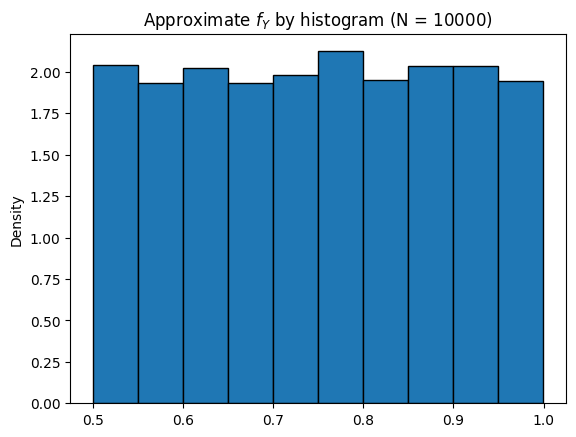

In [7]:
N = 10000

plt.hist(greater_len(N), density=True, edgecolor="black")
plt.ylabel("Density")
plt.title(f"Approximate $f_Y$ by histogram (N = {N})")
#plt.savefig("uniform_hist.pdf", bbox_inches="tight")
plt.show()

### <a name="vi_du_2"/>Ví dụ 2

**Bài toán.** Cho $X_1, X_2, ..., X_n$ là $n$ biến ngẫu nhiên độc lập và cùng phân phối chuẩn $\mathcal{N}(\mu, \sigma^2)$. Đặt
$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i \;\;\; \text{và} \;\;\; S^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar{X})^2.
$$

($X_1, ..., X_n$ thường được gọi là một mẫu ngẫu nhiên cỡ $n$, $\bar{X}$ là trung bình mẫu và $S^2$ là phương sai mẫu.)

Tìm phân phối của các biến ngẫu nhiên $\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ và $\frac{\bar{X} - \mu}{S/\sqrt{n}}$.

*Trả lời:* $\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ có phân phối chuẩn tắc $\mathcal{N}(0, 1)$ và $\frac{\bar{X} - \mu}{S/\sqrt{n}}$ có **phân phối Student**| (Student's t-distribution) với $n-1$ bậc tự do.
    
Xem thêm phân phối Student tại [Wikipedia](https://en.wikipedia.org/wiki/Student\%27s_t-distribution).

In [8]:
def sample(mu, sigma, n, N):
    X = np.random.normal(mu, sigma, size=(N, n))
    X_bar = np.mean(X, axis=1)
    S2 = np.var(X, axis=1, ddof=1)
    return X_bar, S2

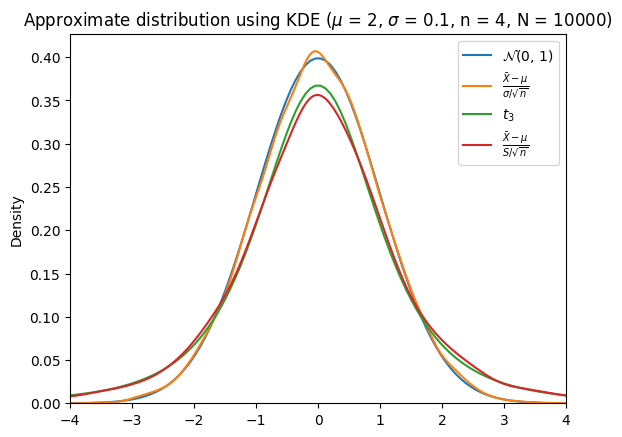

In [9]:
mu, sigma = 2, 0.1
n = 4
N = 10000

X_bar, S2 = sample(mu, sigma, n, N)

x_min, x_max = -4, 4
x = np.linspace(x_min, x_max, 100)

plt.plot(x, stats.norm.pdf(x), label=r"$\mathcal{N}$(0, 1)")
sns.kdeplot((X_bar - mu)/(sigma/np.sqrt(n)), label=r"$\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$", clip=(x_min, x_max))
plt.plot(x, stats.t.pdf(x, n - 1), label=f"$t_{n - 1}$")
sns.kdeplot((X_bar - mu)/(np.sqrt(S2)/np.sqrt(n)), label=r"$\frac{\bar{X} - \mu}{S/\sqrt{n}}$", clip=(x_min, x_max))

plt.ylabel("Density")
plt.title(f"Approximate distribution using KDE ($\mu$ = {mu}, $\sigma$ = {sigma}, n = {n}, N = {N})")
plt.legend()
plt.xlim(x_min, x_max)
#plt.savefig("Student_kde.pdf", bbox_inches="tight")
plt.show()